In [111]:
import osmnx
import osmnx.features
import osmnx.graph
import osmnx.plot
import pandas

In [33]:
query = "Jericho, Oxford, UK"
lat, lon = osmnx.geocoder.geocode(query)
f"The centre of {query} is around latitude {lat} longitude {lon}"

'The centre of Jericho, Oxford, UK is around latitude 51.7587059 longitude -1.2681711'

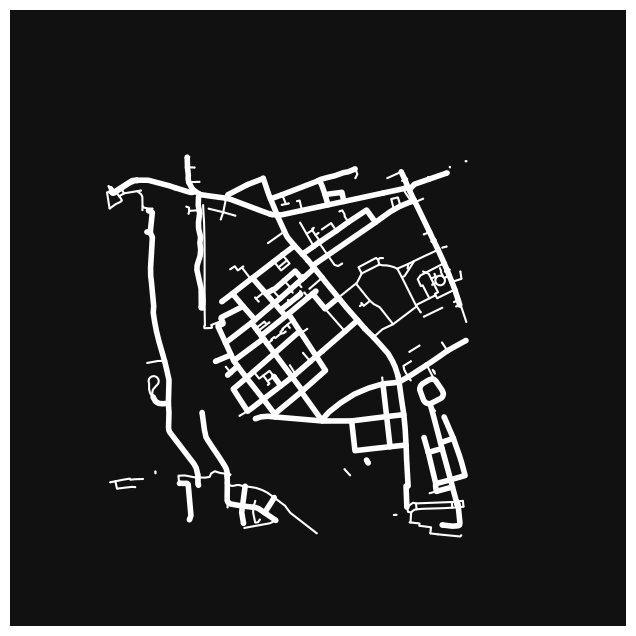

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [128]:
G = osmnx.graph.graph_from_point((lat, lon), 500, network_type="walk", retain_all=True)
osmnx.plot.plot_figure_ground(G)

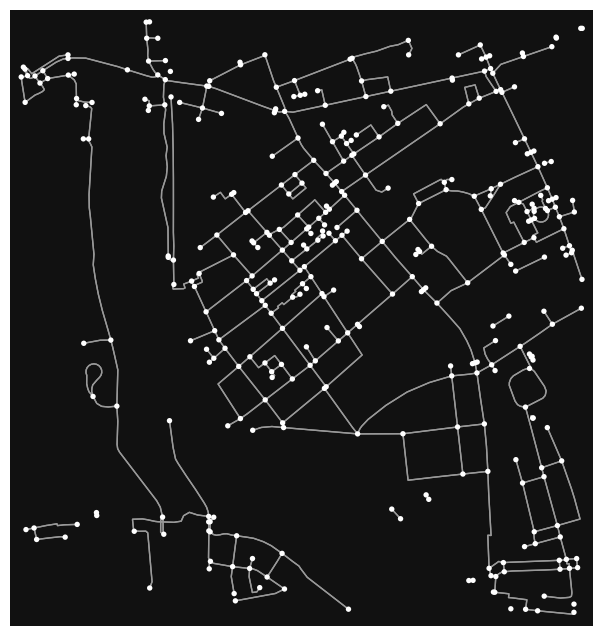

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [129]:
osmnx.plot.plot_graph(G)

In [130]:
nodes, edges = osmnx.convert.graph_to_gdfs(G)
edges

osmid      highway  \
u           v           key                                                     
213881      346138799   0                                3099324  residential   
            1936310815  0                               39542303      primary   
            1122190515  0                               39542303      primary   
213882      1273289457  0                                3099324  residential   
            10651623027 0                                3099323  residential   
...                                                          ...          ...   
12514558623 12514558624 0                             1352577717      service   
            8853144437  0    [956601872, 1352583201, 1352601499]      footway   
12514558624 440045      0                               25604671  residential   
            16464486    0                               25604671  residential   
            12514558623 0                             1352577717      service   

                            maxspeed                name  oneway  \
u           v           key                                        
213881      346138799   0     20 mph  Observatory Street   False   
            1936310815  0     30 mph      Woodstock Road   False   
            1122190515  0     30 mph      Woodstock Road   False   
213882      1273289457  0     20 mph  Observatory Street   False   
            10651623027 0     20 mph     Adelaide Street   False   
...                              ...                 ...     ...   
12514558623 12514558624 0        NaN                 NaN   False   
            8853144437  0        NaN         Willow Walk   False   
12514558624 440045      0     20 mph    Walton Well Road   False   
            16464486    0     20 mph    Walton Well Road   False   
            12514558623 0        NaN                 NaN   False   

                                  reversed      length lanes    ref  \
u           v           key                                           
213881      346138799   0            False    8.118930   NaN    NaN   
            1936310815  0             True    5.042291     2  A4144   
            1122190515  0            False   30.449881     2  A4144   
213882      1273289457  0            False  151.645986   NaN    NaN   
            10651623027 0            False   96.687492   NaN    NaN   
...                                    ...         ...   ...    ...   
12514558623 12514558624 0            False   14.539218   NaN    NaN   
            8853144437  0    [False, True]   51.855512   NaN    NaN   
12514558624 440045      0             True   15.851350   NaN    NaN   
            16464486    0            False   15.649024   NaN    NaN   
            12514558623 0             True   14.539218   NaN    NaN   

                                                                      geometry  \
u           v           key                                                      
213881      346138799   0     LINESTRING (-1.26295 51.76213, -1.26306 51.7621)   
            1936310815  0    LINESTRING (-1.26295 51.76213, -1.26292 51.76209)   
            1122190515  0    LINESTRING (-1.26295 51.76213, -1.26303 51.762...   
213882      1273289457  0    LINESTRING (-1.26442 51.76162, -1.26624 51.76084)   
            10651623027 0    LINESTRING (-1.26442 51.76162, -1.26476 51.761...   
...                                                                        ...   
12514558623 12514558624 0    LINESTRING (-1.27416 51.76223, -1.27424 51.762...   
            8853144437  0    LINESTRING (-1.27416 51.76223, -1.2741 51.7621...   
12514558624 440045      0    LINESTRING (-1.27428 51.76234, -1.27409 51.76242)   
            16464486    0    LINESTRING (-1.27428 51.76234, -1.27428 51.762...   
            12514558623 0    LINESTRING (-1.27428 51.76234, -1.27424 51.762...   

                            width service est_width bridge tunnel access  
u           v           key                           

In [131]:
tags = {"amenity": True}
amenities = osmnx.features.features_from_point((lat, lon), tags, 500)

In [132]:
amenities.amenity.value_counts()

amenity
bicycle_parking           74
parking                   44
bench                     19
restaurant                18
university                17
waste_basket              13
cafe                      12
place_of_worship          10
pub                        9
library                    8
recycling                  7
bar                        6
post_box                   6
dentist                    4
social_facility            4
fast_food                  3
fountain                   3
parking_space              3
toilets                    3
telephone                  2
grit_bin                   2
pharmacy                   2
parking_entrance           2
theatre                    2
school                     2
clinic                     2
parcel_locker              2
doctors                    2
bicycle_repair_station     1
motorcycle_parking         1
waste_disposal             1
ice_cream                  1
vending_machine            1
photo_booth                1
atm   

In [133]:
selected = {}
for key in ["library", "cafe", "bicycle_parking"]:
    gdf = amenities.query(f'amenity=="{key}"')[["amenity", "geometry"]]
    nodes = gdf.loc["node"].copy()
    ways =  gdf.loc["way"].copy()
    nodes.geometry = nodes.geometry.to_crs(27700).buffer(5).to_crs(4326)
    selected[key] = pandas.concat([nodes, ways])

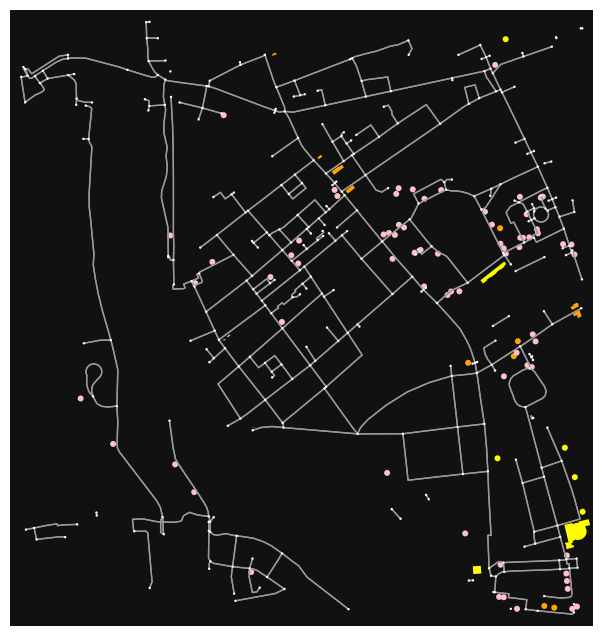

In [138]:
fig, ax = osmnx.plot.plot_footprints(selected["library"], show=False, color='yellow')
fig, ax = osmnx.plot.plot_footprints(selected["cafe"], ax=ax, show=False, color='orange')
fig, ax = osmnx.plot.plot_footprints(selected["bicycle_parking"], ax=ax, show=False, color='pink')
fig, ax = osmnx.plot.plot_graph(G, ax=ax, show=False, node_size=3)